# Bank Customer Churn Analysis
## Project Overview
**Business problem**: 
Customer churn leads to revenue los and increased acquisition costs. A bank needs to understand which customers are at risk of leaving and why, in order to design targeted retention actions.

**Project objective:**  
Analyse customer behaviour and profile characteristics, identify the strongest drivers of churn, and provide data-driven recommendations to reduce attrition.

**Target variable:**  
`Attrition_Flag` (Existing Customer vs Attrited Customer)

**Stakeholders:**  
- Bank management (strategy targets)  
- Marketing/Retention team (campaigns & offers)  
- Customer service (proactive outreach)

**Success criteria (project output):**  
- Clear insights explaining churn patterns  
- Practical recommendations linked to data  


## Project hypotheses

This analysis is guided by the following hypotheses:

- Customers with lower transaction activity are more likely to churn.
- Lower spending levels are associated with higher churn risk.


These hypotheses are explored and validated through exploratory analysis,
descriptive statistics and behavioural clustering.



### Data Understanding & Quality Checks
This section validates the dataset structure, checks for missing values and duplicates, and reviews the target balance (churn rate). 

In [64]:
%pip install feature-engine


Note: you may need to restart the kernel to use updated packages.


# Import libraries and load dataset

In [65]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Shape & columns

In [66]:
file_name = "bank-churners.csv"
df = pd.read_csv(file_name)

df.head()



,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [67]:
df.shape

(10127, 23)

# Types & missing values

In [68]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [69]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

# Duplicates

In [70]:
dup = df.duplicated().sum()

In [71]:
print (dup)

0


### Note on Data Leakage
The dataset contains two `Naive_Bayes_Classifier...` columns which are model outputs/features not suitable for faire modelling or interpretation. They will be excluded from further analysis.

In [72]:
# Columns that should not be used for analysis
columns_to_drop = [
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2",
    "CLIENTNUM"
]

df_clean = df.drop(columns=columns_to_drop)
df_clean.head()



,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


To ensure reproducibility and preserve the integrity of the original dataset, cleaned data is stored separately from the raw source file.


## Brief Data Profile
Key numeric distributions and categorical levels are reviewing to understand customer population structure

In [73]:
# Numeric summary
num_cols = df_clean.select_dtypes(include="number").columns
display(df_clean[num_cols].describe().T)

# Categorical levels (top categories)
cat_cols = df_clean.select_dtypes(exclude="number").columns
for c in cat_cols:
    print(f"\n{c}")
    display(df_clean[c].value_counts().head(10))


,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397



Attrition_Flag


Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


Gender


Gender
F    5358
M    4769
Name: count, dtype: int64


Education_Level


Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64


Marital_Status


Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64


Income_Category


Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64


Card_Category


Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64

## Core statistics and basic probability

To interpret churn behaviour, we use core descriptive statistics 
In addition, a basic probability concept is used:
- churn probability is estimated as a **proportion** of churned customers,
- churn probability is compared across behavioural groups. 
This provide a simple statistical foundation for the later clustering analysis.


In [74]:
behaviour_cols = ["Total_Trans_Amt", "Total_Trans_Ct", "Total_Revolving_Bal", "Avg_Utilization_Ratio"]

# Summary stats by churn status (mean/median/std)
stats_by_churn = (
    df_clean.groupby("Attrition_Flag")[behaviour_cols]
    .agg(["mean", "median", "std", "var"])
    .round(2)
)

stats_by_churn


Total_Trans_Amt                                \
                             mean  median      std          var   
Attrition_Flag                                                    
Attrited Customer         3095.03  2329.0  2308.23   5327914.79   
Existing Customer         4654.66  4100.0  3512.77  12339571.58   

                  Total_Trans_Ct                       Total_Revolving_Bal  \
                            mean median    std     var                mean   
Attrition_Flag                                                               
Attrited Customer          44.93   43.0  14.57  212.24              672.82   
Existing Customer          68.67   71.0  22.92  525.28             1256.60   

                                             Avg_Utilization_Ratio         \
                   median     std        var                  mean median   
Attrition_Flag                                                              
Attrited Customer     0.0  921.39  848951.39                  0.16   0.00   
Existing Customer  1364.0  757.75  574178.02                  0.30   0.21   

                               
                    std   var  
Attrition_Flag                 
Attrited Customer  0.26  0.07  
Existing Customer  0.27  0.07

In [75]:
# Compare churn probability for low vs high transaction activity (quartiles)
q1 = df_clean["Total_Trans_Ct"].quantile(0.25)
q3 = df_clean["Total_Trans_Ct"].quantile(0.75)

low_activity = df_clean[df_clean["Total_Trans_Ct"] <= q1]
high_activity = df_clean[df_clean["Total_Trans_Ct"] >= q3]

p_churn_low = (low_activity["Attrition_Flag"] == "Attrited Customer").mean()
p_churn_high = (high_activity["Attrition_Flag"] == "Attrited Customer").mean()

print(f"Churn rate (low activity, <= Q1):  {p_churn_low:.2%}")
print(f"Churn rate (high activity, >= Q3): {p_churn_high:.2%}")



Churn rate (low activity, <= Q1):  37.07%
Churn rate (high activity, >= Q3): 1.22%


If churn rate is noticeably higher in the low-activity group than in the high-activity group, this supports the hypothesis that **lower transaction engagement increases churn risk**. 


## Behavioural feature relationships

Before clustering, a correlation check is used as a **sanity check** to understand relationships between key behavioural variables.

This step is exploratory and is not used for feature selection, but helps ensure that clustering is applied to complementary features rather than fully redundant ones.


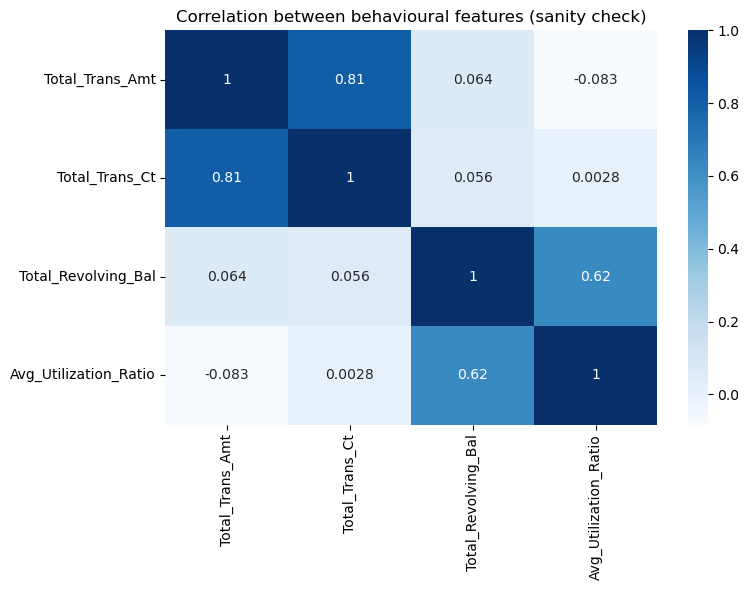

In [76]:
behaviour_cols = ["Total_Trans_Amt", "Total_Trans_Ct", "Total_Revolving_Bal", "Avg_Utilization_Ratio"]

plt.figure(figsize=(8, 6))
sns.heatmap(df_clean[behaviour_cols].corr(), annot=True, cmap="Blues")
plt.title("Correlation between behavioural features (sanity check)")
plt.tight_layout()
plt.show()


This confirms that transaction amount and transaction count are related,but not perfectly correlated, supporting their joint use in clustering.

## Select behavioural features for analysis

In [77]:
features = [
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Revolving_Bal",
    "Avg_Utilization_Ratio"
]

X = df_clean[features].copy()
X.head ()


,Total_Trans_Amt,Total_Trans_Ct,Total_Revolving_Bal,Avg_Utilization_Ratio
0,1144,42,777,0.061
1,1291,33,864,0.105
2,1887,20,0,0.000
3,1171,20,2517,0.760
4,816,28,0,0.000


Confirm that the selected features are numeric and suitable for distance-based clustering.

## Feature scaling so the data ready for clustering

In [78]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# KMeans clustering. For this purpose, the number of clusters is set manually (4) for  interpretability and consistency 

In [79]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


### Creating a segmented dataset. To keep the analytical workflow clear and reproducible, the cleaned dataset is kept separate from the results of the clustering analysis.

In [80]:
df_seg = df_clean.copy()
df_seg["Cluster"] = clusters + 1

## Each customer is now assigned to a behavioural segment based on their spending and transaction patterns.

## PCA for visualisation. 

Principal Component Analysis (PCA) is used for visualisation. It reduces the dimensionality of behavioural features to allow clusters to be displayed in two dinensions. This visualisation helps assess whether behavioural segments are reasonably separated in feature space.


In [81]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
df_seg["PC1"] = pca_components[:, 0]
df_seg["PC2"] = pca_components[:, 1]


## Making a scatter plot

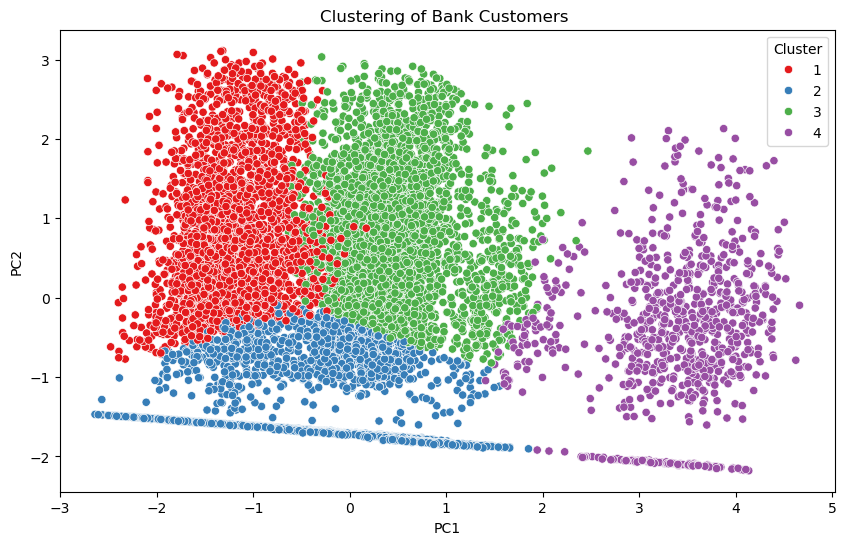

In [82]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_seg,
    x="PC1",
    y="PC2",
    hue="Cluster",
    palette="Set1"
)
plt.title("Clustering of Bank Customers ")
plt.show()

This displays the average values of each feture for every cluster. This helps to interpret the behavioural profile of each customer segment. The PCA visualisation demonstrates that clusters form distinct groups in the reduced feature space, suggesting consistent behavioural segmentation. Overlap between some points is expected, but overall cluster structure is well represented


In [83]:
# Give clusters readable names
cluster_name_map = {
    1: "Disengaging Low-Activity",
    2: "Consistent High-Engagement",
    3: "Financially Stretched Active",
    4: "Selective High-Spending"
}

df_seg["Cluster_Name"] = df_seg["Cluster"].map(cluster_name_map)

## Visual validation of clusters. To further validate the behavioural clusters, weexplore how churn is distributed within each segment. 

This chart examines how churn outcomes are distributed across behavioural clusters. Clusters with a higher concentration of churned customers represent higher-risk behavioural segments.


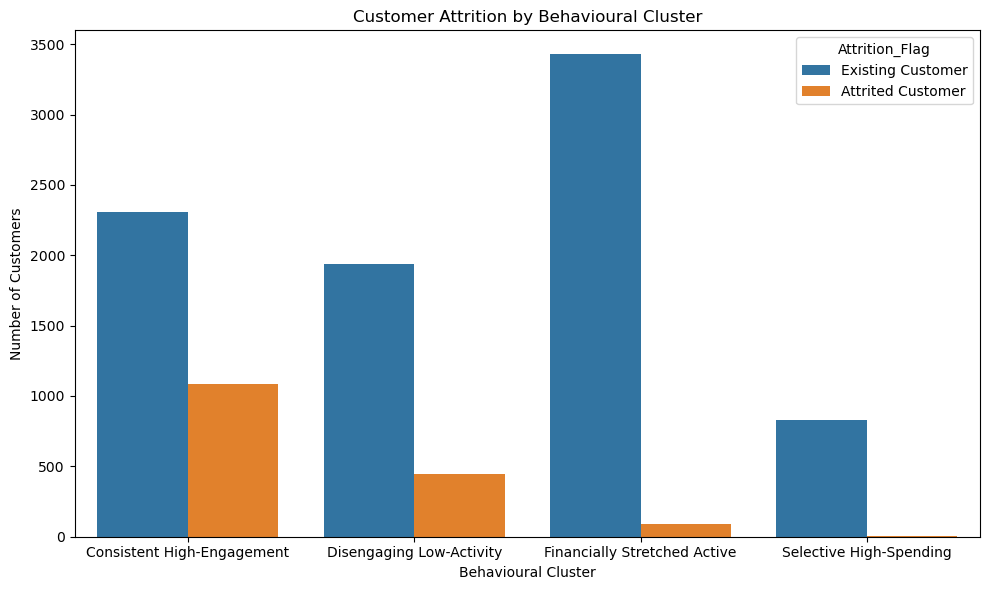

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.countplot(
    data=df_seg,
    x="Cluster_Name",
    hue="Attrition_Flag"
)

plt.title("Customer Attrition by Behavioural Cluster")
plt.xlabel("Behavioural Cluster")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


## Interactive churn risk by behavioural cluster. This visualisation focuses on churn risk at the cluster level

In [85]:
import plotly.express as px

cluster_churn = (
    df_seg.assign(churn_flag=df_seg["Attrition_Flag"].str.contains("Attrited"))
          .groupby("Cluster_Name")["churn_flag"]
          .mean()
          .mul(100)
          .reset_index(name="Churn_Rate")
)

fig = px.bar(
    cluster_churn,
    x="Cluster_Name",
    y="Churn_Rate",
    text="Churn_Rate",
    title="Churn Rate by Behavioural Cluster"
)



fig.show()



This interactive visualisation focuses on churn risk at the cluster level. 


 Customers with **low transaction activity and low spending** are concentrated   in the *Disengaging Low-Activity* cluster and show higher churn incidence. Highly engaged clusters dominate the upper-right region of the plot and are  largely composed of retaine customers.

The analysis show that churn is strongly associated with lower transaction engagement and weaker spending patterns. Behavioural clustering translates these patterns into actionable customer segments.


## Limitations and alternative approaches

This analysis is based on a static snapshot of customer behaviour and does not capture behavioural changes over time.

Clustering is used as an interpretative tool rather than a predictive model. Future work could include time-based analysis or supervised learning approaches to estimate individual churn probability.



### Use of AI Assistance

AI tools were used during this project to checking code errors, clarification of analytical reasoning. 
